<a href="https://colab.research.google.com/github/mausoleo/rede_neural_convolucinal/blob/main/FiltroDesmatamento_Antes_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image, ImageFilter

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carregar imagem
image = Image.open('/content/imagens_cotia/cotia_21.png')

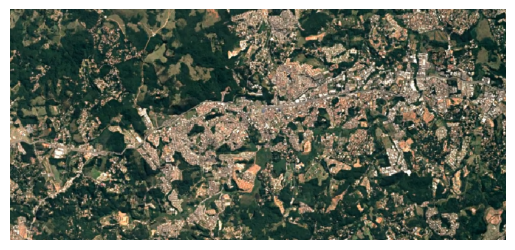

In [ ]:
# Exibir imagem
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
imagem = np.array(image)

# Verificar se a imagem tem 4 canais (RGBA) e converter para RGB
if imagem.shape[2] == 4:
    imagem = cv2.cvtColor(imagem, cv2.COLOR_RGBA2RGB)

In [ ]:
# Alteração da imagem para o padrão HSV
hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

In [ ]:
# Definir os limites para a cor verde em HSV
verde_minimo = np.array([15, 1, 1])  # Limite inferior para verde
verde_maximo = np.array([85, 255, 255])  # Limite superior para verde

In [ ]:
# Criação da máscara para a cor verde
mascara = cv2.inRange(hsv, verde_minimo, verde_maximo)

In [ ]:
# Definição da cor verde (em RGB)
nova_cor = [0, 255, 0]

In [ ]:
# Criação da nova imagem com a cor substituída
nova_imagem = np.full_like(imagem, nova_cor)

In [ ]:
resultado = np.where(mascara[:, :, None].astype(bool), nova_imagem, imagem)
resultado_pil = Image.fromarray(resultado)

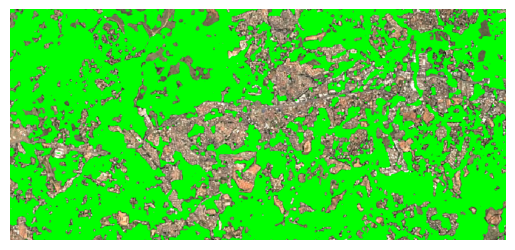

In [ ]:
# Exibir imagem
plt.imshow(resultado)
plt.axis('off')
plt.show()

In [ ]:
# Configura a zona de exibição de 10 (largura) e 5 (altura)
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

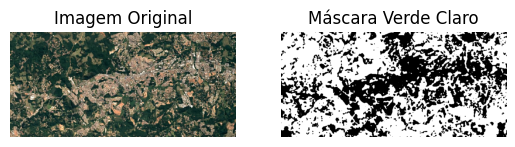

In [ ]:
# Primeiro, exibimos a imagem original
plt.subplot(1, 2, 1)  # (1 linha, 2 colunas, 1ª imagem)
plt.imshow(image)  # Exibe a imagem original
plt.title('Imagem Original')  # Define o título
plt.axis('off')  # Remove os eixos da imagem



# Segundo, exibimos a máscara que detecta as áreas verdes
plt.subplot(1, 2, 2)  # (1 linha, 2 colunas, 2ª imagem)
plt.imshow(mascara, cmap='gray')  # Exibe a máscara em escala de cinza (0: preto, 255: branco)
plt.title('Máscara Verde Claro')  # Define o título
plt.axis('off')  # Remove os eixos da imagem


plt.savefig('imagem_preto_braco.png', bbox_inches="tight")
plt.show()

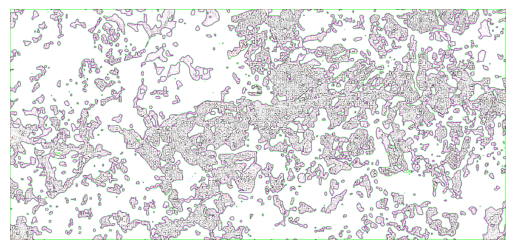

In [ ]:
# Imagem de Contorno
imagem_contornada = resultado_pil.filter(ImageFilter.CONTOUR)
plt.imshow(imagem_contornada)
plt.axis('off')
plt.savefig('imagem_filtro_bordas.png', bbox_inches="tight")
plt.show()

In [ ]:
area_verde = np.sum(mascara > 0)
area_total = imagem.shape[0] * imagem.shape[1]
porcentagem_verde = (area_verde / area_total) * 100
print(f"A porcentagem de área verde é: {porcentagem_verde:.2f}%")

A porcentagem de área verde é: 59.71%
